### Process raw historical baby name data in the United States (1880-2023)

Historical baby names were downloaded from [this social security administration website](https://www.ssa.gov/oact/babynames/limits.html).  THere is one download for all US names and a second download that includes names by state as well. The "All Names" download included the following ReadMe:

![BabyName-ReadMe](allnames-ReadMe.png) 


In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Grab all text files and compile into master dataframe
allnames_paths = list(Path('./allnames').glob('yob*.txt'))
df_allnames = pd.DataFrame([], columns=['Name', 'Sex'])
df_allnames.set_index(['Name', 'Sex'], inplace=True)
for text_file in allnames_paths:
    year = str(text_file.name.split('.')[0][3:])
    df_temp = pd.read_csv(text_file, names=['Name', 'Sex', year], 
                          dtype={'Name': str, 'Sex': str, year: 'Int32'})
    df_temp.set_index(['Name', 'Sex'], inplace=True)
    df_allnames = df_allnames.join(df_temp, how='outer')
# Clean up resultant dataframe
df_allnames.fillna(0, inplace=True)
ordered_cols = df_allnames.columns.sort_values(ascending=False)
df_allnames = df_allnames[ordered_cols]

In [3]:
# Spot checks on data quality:
name = 'Bob'
sex = 'M'
year = '1985'
print(df_allnames.loc[df_allnames.index == (name, sex)][year], '\n\n', '-------')

df = pd.read_csv(f'./allnames/yob{year}.txt', header=None)
df.columns=['Name', 'Sex', 'Count']
# Set a multi-index for name and sex for names that go both ways
df.set_index(['Name', 'Sex'], inplace=True)
print(df.loc[df.index == (name, sex)])

Name  Sex
Bob   M      73
Name: 1985, dtype: Int32 

 -------
          Count
Name Sex       
Bob  M       73


In [4]:
# Breakout names by sex 
males = df_allnames[['M' in x for x in list(df_allnames.index)]]
males = males.droplevel('Sex')
females = df_allnames[['F' in x for x in list(df_allnames.index)]]
females = females.droplevel('Sex')

In [5]:
n = 1000
male_dict = {}
female_dict = {}
for year in males.columns:
    male_dict[year] = males[year].nlargest(n).index.values
    female_dict[year] = females[year].nlargest(n).index.values
top_males = pd.DataFrame(male_dict)
top_females = pd.DataFrame(female_dict)

In [28]:
# Need openpyxl to complete
writer = pd.ExcelWriter('Top-Names.xlsx', engine = 'xlsxwriter')
top_males.to_excel(writer, sheet_name='Males')
top_females.to_excel(writer, sheet_name='Females')
writer.close()

In [7]:
# Summary stats
print('Summary statistics for baby names (1880-2023):')
print('----------------------------------------------')
print(f'Total number of unique names: male and female:  {len(df_allnames):0,}')
print(f'Total number of unique names: male:  {len(males):0,}')
print(f'Total number of unique names: female:  {len(females):0,}')

Summary statistics for baby names (1880-2023):
----------------------------------------------
Total number of unique names: male and female:  115,164
Total number of unique names: male:  44,261
Total number of unique names: female:  70,903


In [16]:
males.columns[:51]

Index(['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'],
      dtype='object')

In [22]:
males.loc[males.index == 'Wren']['2020'].values[0]

150

In [24]:
for year in males.columns[:50]:
    print(f'{year}: {females.loc[females.index == 'Wren'][year].values[0]}')

2023: 1537
2022: 1607
2021: 1227
2020: 862
2019: 745
2018: 666
2017: 675
2016: 595
2015: 405
2014: 403
2013: 340
2012: 254
2011: 206
2010: 185
2009: 134
2008: 114
2007: 93
2006: 100
2005: 56
2004: 55
2003: 39
2002: 35
2001: 33
2000: 18
1999: 33
1998: 24
1997: 12
1996: 15
1995: 16
1994: 9
1993: 20
1992: 10
1991: 20
1990: 10
1989: 10
1988: 14
1987: 15
1986: 11
1985: 11
1984: 0
1983: 11
1982: 5
1981: 14
1980: 10
1979: 15
1978: 12
1977: 16
1976: 8
1975: 6
1974: 0


In [340]:
total_babies = df_allnames.sum(axis=0)

In [342]:
total_males = males.sum(axis=0)
total_females = females.sum(axis=0)

In [352]:
male_surplus = 100*(total_males-total_females)/total_babies

<Axes: >

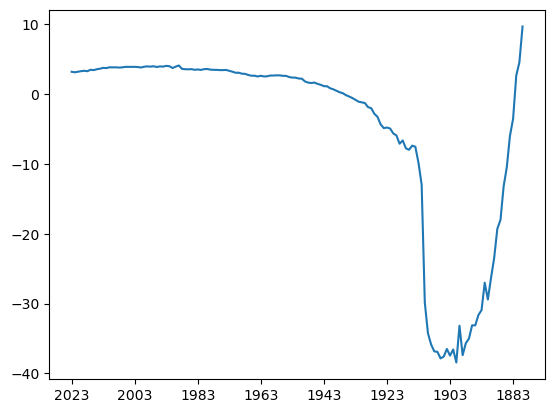

In [353]:
male_surplus.plot()